In [1]:
%pylab inline

import numpy as np
import pandas as pd

from IPython import display

Populating the interactive namespace from numpy and matplotlib


## Would You Be Impressed?

<!-- PELICAN_BEGIN_SUMMARY -->

Favorite band

    genuinely don't know how many times I've seen them

this show

    as the footsteps fade forever

    https://genius.com/Catch-22-as-the-footsteps-die-out-forever-lyrics

got me curious

<!-- PELICAN_END_SUMMARY -->

## That'll Be the Day(s of Various Shows)

### (Data) Hell

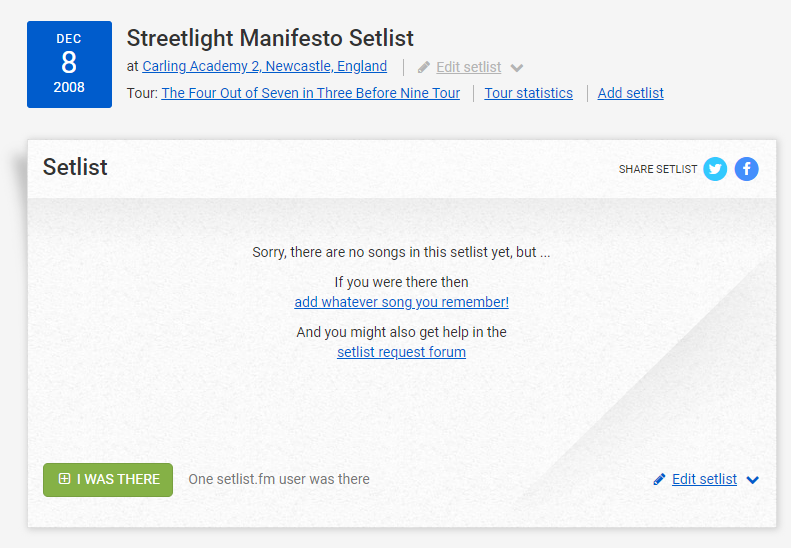

In [2]:
display.Image('images/no_records.PNG')

Or not listed at all. Still have the printed ticket from the first time I saw them.

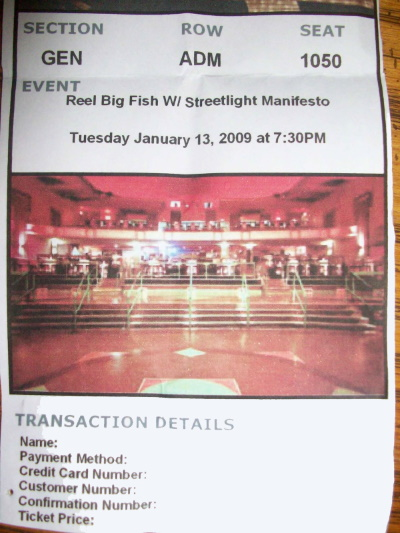

In [3]:
display.Image('images/first_show.jpg')

[Nowhere to be found on this site](https://www.setlist.fm/setlists/streetlight-manifesto-6bd68a52.html?page=39), where (at the time of writing) the date is located.

### Failing, Flailing
    sorry mobile readers

In [4]:
from get_data import load_data

df = load_data()

df.head()

,everything went numb,that'll be the day,point / counterpoint,if and when we rise again,"a better place, a better time",we are the few,"failing, flailing",here's to life,a moment of silence,a moment of violence,...,the three of us,ungrateful,the littlest things,the hands that thieve,with any sort of certainty,if only for memories,they broke him down,toe to toe,"oh me, oh my",your day will come
dates,,,,,,,,,,,,,,,,,,,,,
2009-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-01-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-01-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-02-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Lot of missing data. Majority of the shows have 7+ songs

In [5]:
df.sum(axis=1).value_counts().sort_index()

0     124
1       3
2       1
3       1
4       1
5       3
6       5
7       4
8      13
9       8
10      2
11      1
12      6
13      8
14     36
15     50
16     59
17     33
18     17
19      1
20      2
23      2
dtype: int64

In [6]:
trimmed = df[df.sum(axis=1) >= 7]

## The Receiving End of It All

The tracks are listed chronologically from top to bottom, each album divided by the red lines.

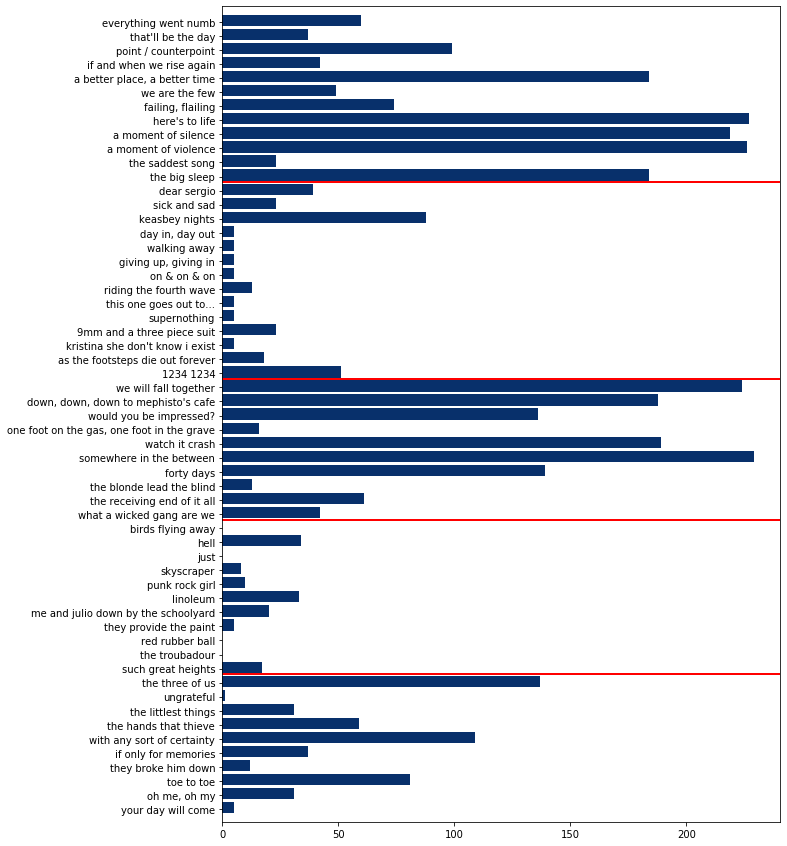

In [7]:
from viz import plot_all_time_plays

plot_all_time_plays(trimmed);

And this makes sense to me. 

A bit of background on the albums for the uninitiated:

- *Everything Goes Numb (2003)*: Their oldest album, go figure its tracks have an impressive overall play count
- *Keasbey Nights (2006)*: A track by track re-recording of an album of a band the lead singer used to be in. [It's this whole thing](https://en.wikipedia.org/wiki/Keasbey_Nights#Streetlight_Manifesto_version). Not a ton of overlap with the two groups touring at the same time, but the low play-count makes sense. Especially since...
- *Somewhere in the Between (2007)*: My personal favorite. Cover to cover bangers and formative as hell for High-School Nick.
- *99 Songs of Revolution: Vol. 1 (2010)*: The perhaps inappropriately-titled "Vol. 1" was an album exclusively of covers, years before Weezer made it cool. It was a huge hit in my friend group and having gotten into the band in '08, the first of their albums I picked up at launch. However, despite the overwhelming demand from a dozen midwestern teenagers, most of the tracks didn't get their moment in the sun at live shows-- most noteably [their cover of Radiohead's Just](https://www.youtube.com/watch?v=TZnsNexCMg0), which is probably in my top 10 covers of anything.
- *The Hands That Thieve (2013)*: The last album they put out which kicked off, to everyone's dismay, The End Of The Beginning Tour. [They put out a press release](https://dyingscene.com/news/streetlight-manifesto-to-quit-year-round-touring/) outlining the twilight years of Streetlight Manifesto as we know it.

>We’ve solidified plans to tour our well-traveled asses off for one last year, until the end of 2013, at which time we will be not necessarily be moving on from the band, but changing our approach to what we do with the majority of our time. More specifically, we will no longer be touring year round, nor will we be touring much at all anymore. We have decided to step away from the table before we get sick of our favorite meal;

Group chats were abuzz, Facebook blew up, as everyone I'd shared this band with clamored to buy tickets for The Last Streetlight Show™. The end was nigh.

They'd then go on to steadily perform 150+ shows over the following 6 years, lol

### Day in, Day Out

Of course, flat play counts are interesting to look at, but don't tell the whole story.

When you take a look at how often songs are played together (the darker squares below), you start to get a good intuition for your typical setlist, should you see them live.

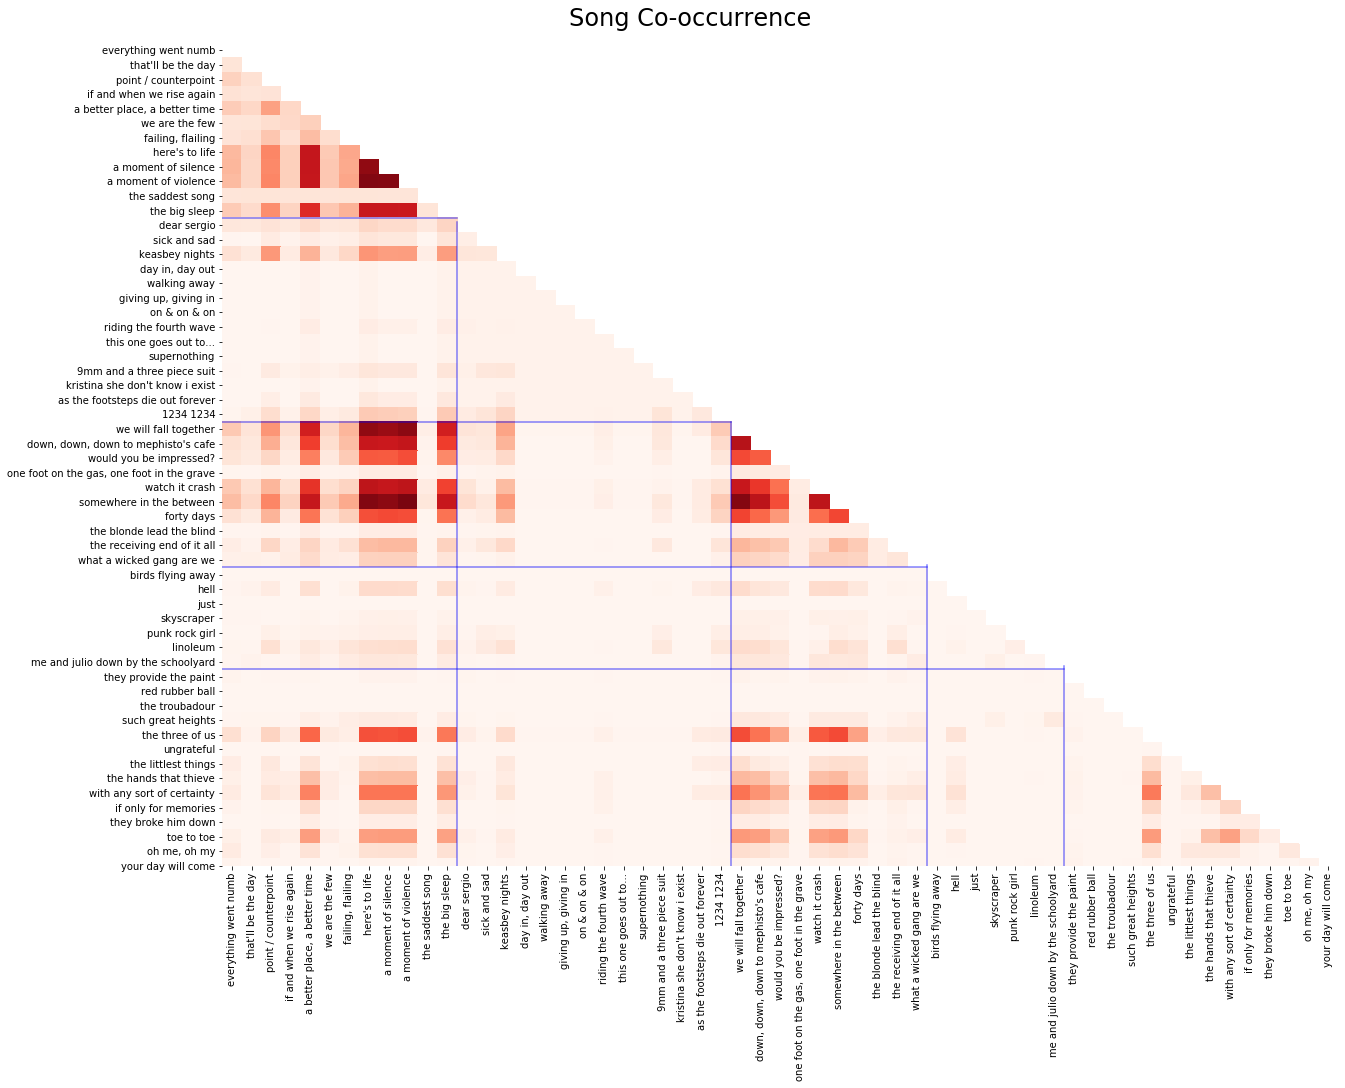

In [8]:
from viz import cooccurrence_heatmap

cooccurrence_heatmap(trimmed);

Notably, *Moment of Silence* is almost always played alongside *Moment of Violence* because being there for [this number is as rowdy as it is fun](https://youtu.be/xSDansvaEz8?t=331). *Watch it Crash* has [my favorite horn line feature that they play](https://youtu.be/yFEYPXheiiM?t=209) so I'm always happy to hear that. *Somewhere in the Between* is usually their closer.

But going back to the original motivation for getting at this data, if you trace the squares represented by *As the Footsteps Die Out Forever*, there's really not a whole lot going on. The song doesn't co-occur with much because it doesn't... occur.

But this visualization basically drowns out information about our B-Sides by the nature of its design.

### We Will Fall Together

When we normalize the co-occurences by how often the songs actually get played we get a bit more insight.

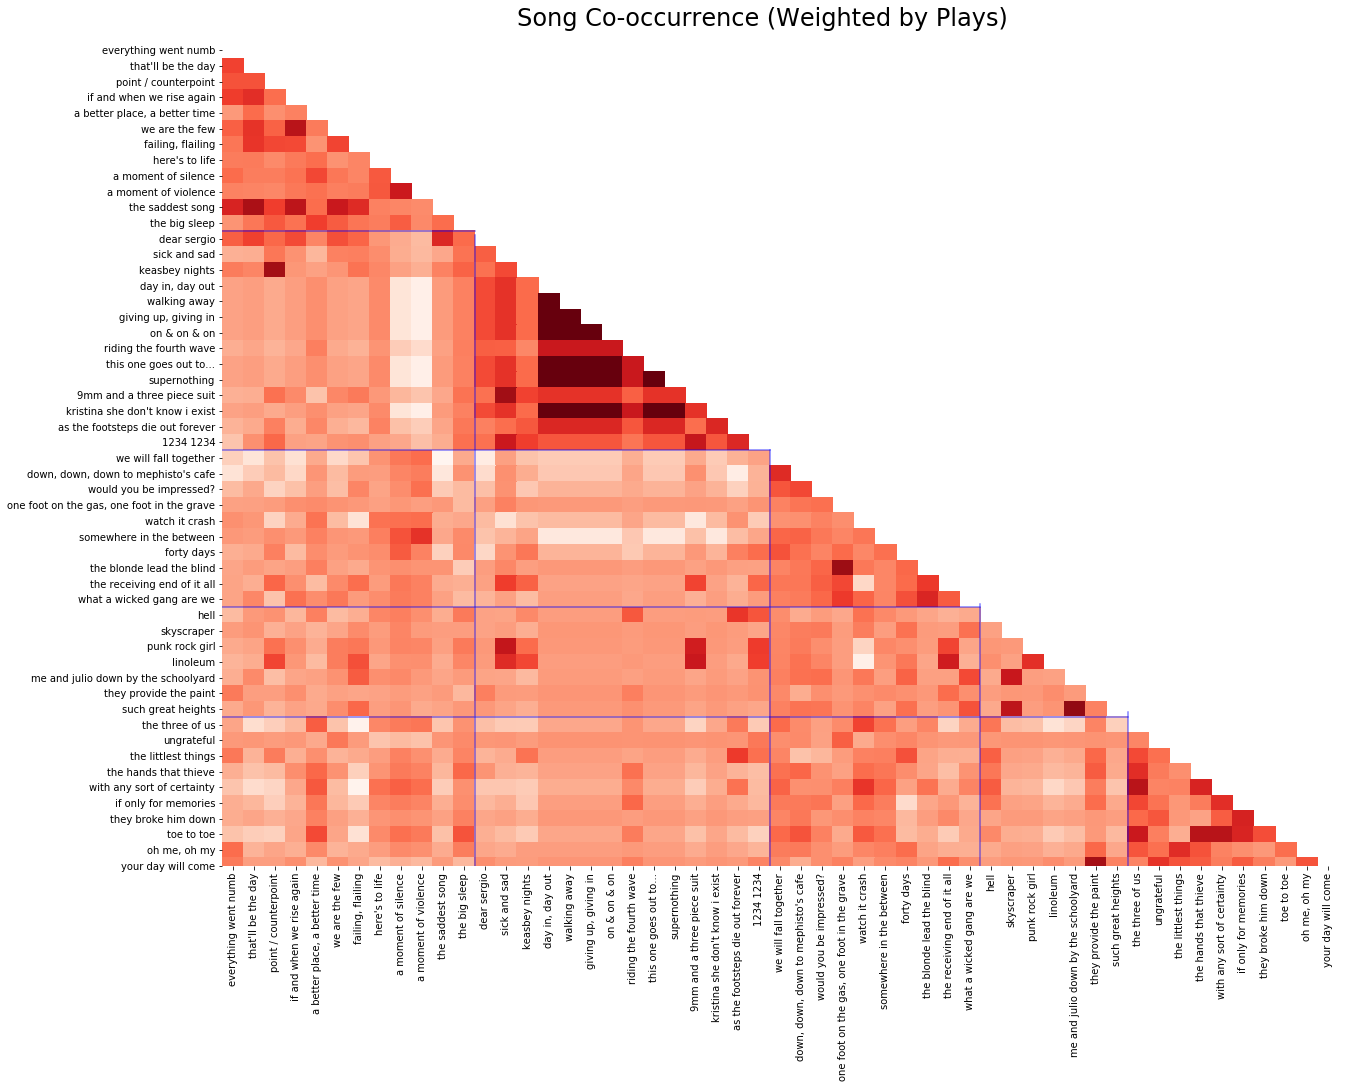

In [ ]:
cooccurrence_heatmap(trimmed, play_weighted=True);

A few intersections stick out to me in particular:

- (*Keasbey Nights*, *Point/Counterpoint*): As mentioned above, they very regularly merge the two together if they're getting played at all.
- (*The Blonde Lead the Blind*, *One Foot On the Gas, One Foot in the Grave*): Both awesome songs, often played together in the couple years after their album dropped in '07. Similarly, they both kind of fell off together, shouldered out by newer, more-popular songs.
- (*Such Great Heights*, *Me and Julio Down By the Schoolyard*): Same rationale as above, but this one particularly stings. [Just listen to the first 30 seconds](https://www.youtube.com/watch?v=i_6KTZgayxg).

In general, though, there's a clear patten happening *at the album level*. 

Looking at the triangles along the diagonal, you'd expect to see some album-to-album correlation-- typically as bands release new material, they take it on the road. But the darkness of the *Keasbey Nights* album stands out starkly, which is totally consistent with the low play count these tracks have, overall.

In fact at a glance, it seems as if the tracks were all played together, [which is exactly what happened, apparently](https://twitter.com/SManifesto/status/973614824839036928).

### As the Footsteps (Don't) Die Out Forever

And so filtering down all of our shows where they played the song, we can see that the first 5 times it shows up in our data are these *Keasbey Nights* album events.

In [ ]:
atfdof = trimmed['as the footsteps die out forever'] == 1

trimmed[atfdof].index[:5]

DatetimeIndex(['2018-05-04', '2018-05-05', '2018-07-20', '2018-07-25',
               '2018-12-21'],
              dtype='datetime64[ns]', name='dates', freq=None)

Then, 21 years after its initial release and 13 years after its re-release, this song starts making the rotation in [their 2019 tour dates.](https://www.setlist.fm/search?artist=6bd68a52&query=tour:%28Thieves+In+The+Night+Tour+2019%29)

In [ ]:
trimmed[atfdof].index[5:]

DatetimeIndex(['2019-06-28', '2019-06-29', '2019-07-13', '2019-07-26',
               '2019-07-28', '2019-07-29', '2019-07-30', '2019-08-01',
               '2019-08-03', '2019-09-13', '2019-09-27', '2019-09-28',
               '2019-09-29'],
              dtype='datetime64[ns]', name='dates', freq=None)

Huh.

## The Littlest Things 

Finally, I had all of this data and I'd spent a good amount of time slicing it, aggregating it, manipulating it.

But I wanted to figure out a way to look at everything at once. Sorry mobile users, lol

In [ ]:
from viz import make_setlist_heatmap

make_setlist_heatmap(trimmed);

The tracks are organized along the left and with enough zooming and scrolling, you can write your own narrative around each track, but broadly this shows us:

- The staying power of some of their more popular tracks
- Various rare one-offs over the years
- The heavy rotation of *Hands that Thieve* tracks after its 2013 release
- The, by contrast, polite recital of tracks off of *99 Songs* after *its release*
- The "All Keasbey" and "All Everything Goes Numb" shows they put on in 2018

## This One Goes Out to...

In [ ]:
display.Image('images/throwback.jpg')

In [ ]:
display.Image('images/2015.jpg')

In [ ]:
display.Image('images/botar.jpg')

In [ ]:
display.Image('images/wedding.jpg')

Which isn't to say that I didn't, objectively, peak in High School, lol 

In [ ]:
display.Image('images/nostril.jpg')

----------------------



## Walking Away